In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [2]:
from sklearn.tree import plot_tree

In [3]:
data = pd.DataFrame({
    'X_1': [1, 1, 1, 0, 0, 0, 0, 1],
    'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
    'Y': [1, 1, 1, 1, 0, 0, 0, 0]
})
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [4]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [5]:
X = data[['X_1', 'X_2']]
y = data.Y

In [6]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.8333333333333334, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.25, 0.5, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

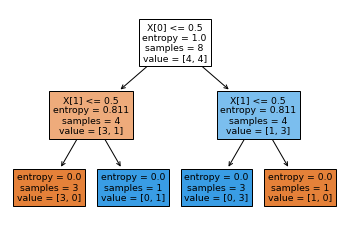

In [7]:
plot_tree(clf,filled=True)

In [8]:
dogs = pd.read_csv("https://stepik.org/media/attachments/course/4852/cats.csv")
dogs = dogs.drop('Unnamed: 0', axis=1)
dogs

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [9]:
dogs_X = dogs.iloc[:, :3]
dogs_y = dogs.iloc[:, 3]

In [10]:
dogs_clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
dogs_clf.fit(dogs_X, dogs_y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

[Text(0.5, 0.75, 'Лазает по деревьям <= 0.5\nentropy = 0.971\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]')]

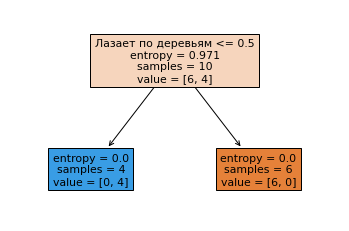

In [11]:
tree.plot_tree(dogs_clf, feature_names=dogs_X.columns, filled=True)

In [67]:
train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)
test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)

In [68]:
x_train = train.drop(['species'], axis=1)
y_train = train.species

x_test = test.drop(['species'], axis=1)
y_test = test.species

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

x_train

,sepal length,sepal width,petal length,petal width
130,7.4,2.8,6.1,1.9
7,5.0,3.4,1.5,0.2
11,4.8,3.4,1.6,0.2
142,5.8,2.7,5.1,1.9
109,7.2,3.6,6.1,2.5
...,...,...,...,...
147,6.5,3.0,5.2,2.0
124,6.7,3.3,5.7,2.1
123,6.3,2.7,4.9,1.8
146,6.3,2.5,5.0,1.9


In [74]:
scores_data = pd.DataFrame({'max_depth':[],
                                  "train_score": [],
                                  "test_score": [],
                                  "mean_cross_val_score": []})
scores_data

,max_depth,train_score,test_score,mean_cross_val_score


In [75]:
rs = np.random.seed(0) 
for max_depth in range (1,100):
    flowers_clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=rs, max_depth=max_depth)
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    mean_cross_val_score = cross_val_score(clf, x_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth':[max_depth],
                                  "train_score": [train_score],
                                  "test_score": [test_score],
                                  "mean_cross_val_score": [mean_cross_val_score]})
    #print(temp_score_data)
    scores_data = pd.concat([scores_data, temp_score_data ])

In [76]:
scores_data

,max_depth,train_score,test_score,mean_cross_val_score
0,1.0,1.0,0.92,0.96
0,2.0,1.0,0.94,0.96
0,3.0,1.0,0.94,0.96
0,4.0,1.0,0.94,0.96
0,5.0,1.0,0.92,0.96
...,...,...,...,...
0,95.0,1.0,0.92,0.96
0,96.0,1.0,0.92,0.96
0,97.0,1.0,0.92,0.96
0,98.0,1.0,0.94,0.96


In [81]:
scores_data_long = pd.melt(scores_data, id_vars='max_depth', value_vars=['train_score', 'test_score'],
                          var_name='set_type',value_name='score')
scores_data_long.head()

,max_depth,set_type,score
0,1.0,train_score,1.0
1,2.0,train_score,1.0
2,3.0,train_score,1.0
3,4.0,train_score,1.0
4,5.0,train_score,1.0


<AxesSubplot:xlabel='max_depth', ylabel='score'>

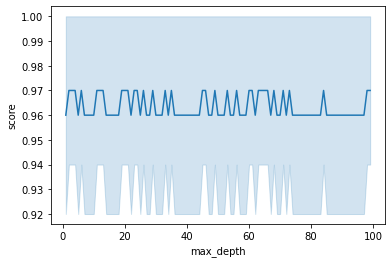

In [83]:
#sns.lineplot(x=scores_data_long.max_depth, y=scores_data_long.score)

<AxesSubplot:xlabel='max_depth', ylabel='score'>

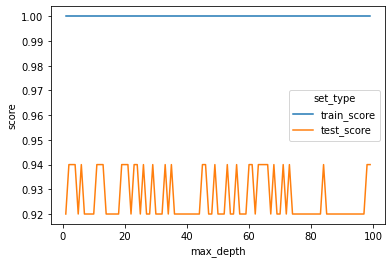

In [84]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [109]:
cats_dogs_train = pd.read_csv("https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv")

In [114]:
x_train = cats_dogs_train.drop(['Вид'], axis=1)
y_train = cats_dogs_train['Вид']



In [115]:
x_train

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0
...,...,...,...,...,...
995,8,3.2,1,0,1
996,7,2.8,1,0,1
997,6,2.4,1,0,1
998,7,2.8,1,0,1


In [116]:
cats_data = pd.DataFrame({'max_depth':[],
                                  "train_score": [],
                                  #"test_score": [],
                                  "mean_cross_val_score": []})

In [118]:
rs = np.random.seed(0) 
for max_depth in range (1,100):
    cats_clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=rs, max_depth=max_depth)
    cats_clf.fit(x_train, y_train)
    train_score = cats_clf.score(x_train, y_train)
    #test_score = cats_clf.score(x_test, y_test)
    mean_cross_val_score = cross_val_score(cats_clf, x_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth':[max_depth],
                                  "train_score": [train_score],
                                  #"test_score": [test_score],
                                  "mean_cross_val_score": [mean_cross_val_score]})
    #print(temp_score_data)
    cats_data = pd.concat([cats_data, temp_score_data ])

In [119]:
cats_data

,max_depth,train_score,mean_cross_val_score
0,1.0,1.0,1.0
0,2.0,1.0,1.0
0,3.0,1.0,1.0
0,4.0,1.0,1.0
0,5.0,1.0,1.0
...,...,...,...
0,95.0,1.0,1.0
0,96.0,1.0,1.0
0,97.0,1.0,1.0
0,98.0,1.0,1.0


In [120]:
cats_clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=rs, max_depth=3)
cats_clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [126]:

cats_dogs_test = pd.read_json("F:\Download\dataset_209691_15.txt")


hh = cats_clf.predict(X=cats_dogs_test)
l = list(hh)
l.count('собачка')

49

In [129]:
df = pd.read_csv("https://stepik.org/media/attachments/course/4852/songs.csv")
df

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3
...,...,...,...,...,...,...,...,...,...,...
355,just-like-that,2006,abba,Pop,Until that day\nMy life had been a river\nFoll...,972,2,0,0,1
356,ring-ring,1995,abba,Pop,I was sitting by the phone\nI was waiting all ...,1283,33,0,0,3
357,reina-danzante,1981,abba,Pop,You can dance\nYou can jive\nHaving the time o...,810,1,0,0,0
358,code-of-the-streets,2006,gangstarr,Hip-Hop,Take this for example young brothers want rep\...,1996,34,0,0,5


In [130]:
df = df.drop(['year', 'genre'], axis=1)

,song,artist,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,gangstarr,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,blind-guardian,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,blind-guardian,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,blind-guardian,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,gangstarr,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3
...,...,...,...,...,...,...,...,...
355,just-like-that,abba,Until that day\nMy life had been a river\nFoll...,972,2,0,0,1
356,ring-ring,abba,I was sitting by the phone\nI was waiting all ...,1283,33,0,0,3
357,reina-danzante,abba,You can dance\nYou can jive\nHaving the time o...,810,1,0,0,0
358,code-of-the-streets,gangstarr,Take this for example young brothers want rep\...,1996,34,0,0,5


In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [131]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
lw = 5
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



NameError: name 'y_predicted_prob' is not defined